# Capstone Project 2: Analisis Popularitas Listing Airbnb di Bangkok

## Latar Belakang
Airbnb di Bangkok memiliki lebih dari 14.000 listing aktif, dengan rata-rata pendapatan tahunan sekitar $7.443 dan tingkat okupansi sekitar 44%. Meskipun ada variasi dalam kinerja listing, beberapa faktor utama seperti harga, jenis kamar, lokasi, dan ulasan berperan penting dalam menentukan popularitas dan potensi pendapatan. Namun, banyak listing yang tidak optimal dalam menarik tamu, terutama yang jarang memperbarui informasi dan mendapatkan ulasan.

**Sumber:** [Airroi](https://www.airroi.com/report/world/thailand/bangkok/bangkok)

## Problem Statement
Tujuan dari analisis ini adalah untuk mengidentifikasi faktor-faktor yang mempengaruhi performa listing Airbnb di Bangkok, baik dalam hal popularitas maupun potensi pendapatan. Faktor-faktor ini akan dieksplorasi berdasarkan data yang tersedia, termasuk jenis kamar, harga, lokasi, serta ulasan tamu. Dengan pemahaman yang lebih baik mengenai faktor-faktor ini, Airbnb dapat memberikan rekomendasi yang lebih tepat kepada host untuk mengoptimalkan listing mereka.

### Pertanyaan Analitis (Big Questions):
1. **Bagaimana pengaruh jenis kamar (misalnya: seluruh tempat, kamar pribadi, kamar bersama) terhadap kinerja listing?**  
2. **Apakah ada hubungan signifikan antara harga dan tingkat okupansi yang memengaruhi pendapatan?**  
3. **Faktor apa saja yang membuat listing dengan jumlah ulasan terbanyak memiliki kinerja lebih baik dibandingkan lainnya?**  
4. **Sejauh mana keterkinian ulasan mempengaruhi performa listing Airbnb di Bangkok?**  
5. **Apakah listing milik host profesional memiliki performa yang lebih baik dibandingkan host non-profesional?**

Analisis ini bertujuan untuk menggali lebih dalam faktor-faktor yang memengaruhi performa listing dan memberikan rekomendasi untuk mengoptimalkan potensi pendapatan dan okupansi. Langkah pertama yang akan dilakukan adalah data cleaning dan feature engineering untuk memastikan kualitas data yang digunakan, serta menyiapkan fitur tambahan yang dapat memperkaya analisis.

**Langkah Selanjutnya:**  
Data cleaning dan feature engineering adalah tahap pertama yang sangat penting. Data yang digunakan akan dievaluasi untuk memastikan kualitasnya, dengan memeriksa adanya nilai yang hilang, duplikasi, atau data yang tidak konsisten. Selain itu, fitur baru yang dapat memperkaya analisis juga akan dikembangkan untuk memberikan wawasan lebih dalam terhadap faktor-faktor yang mempengaruhi performa listing.

# Data Preparation 

## Import Library
Pada tahap ini, kita akan mengimpor library yang diperlukan untuk analisis data dan visualisasi. Beberapa library yang akan digunakan di antaranya:

In [1]:
# Import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import requests
import folium

import warnings
warnings.filterwarnings('ignore')

| Library             | Kegunaan                                                                                                                                                 |
| ------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `pandas`            | Digunakan untuk manipulasi data, seperti pembersihan, transformasi, dan analisis data tabular.                                                           |
| `numpy`             | Digunakan untuk operasi numerik, terutama untuk menghitung statistik dan manipulasi array/matriks.                                                       |
| `matplotlib.pyplot` | Digunakan untuk visualisasi data, terutama grafik dasar seperti histogram, boxplot, dll.                                                                 |
| `seaborn`           | Digunakan untuk visualisasi data tingkat lanjut dengan desain yang lebih menarik dan informatif (misalnya, heatmap untuk missing values, pairplot, dll). |
| `scipy.stats`       | Digunakan untuk analisis statistik, seperti uji normalitas, uji hipotesis, dan uji outlier.                                                              |
| `requests`          | Digunakan untuk permintaan HTTP, berguna jika Anda mengunduh data dari API atau sumber eksternal.                                                        |
| `folium`            | Digunakan untuk visualisasi peta interaktif, berguna jika data melibatkan koordinat geografis (latitude/longitude).                                      |
| `warnings`            | Mengatur agar Python mengabaikan semua peringatan (warnings) yang muncul selama eksekusi kode.                                      |

## Load Dataset
Langkah pertama dalam analisis ini adalah memuat dataset yang akan digunakan. 
Impor data dilakukan dari dua sumber: 
- Dataset utama dalam format CSV yang berisi informasi mengenai listing Airbnb di Bangkok.
- Data GeoJSON yang menggambarkan distrik-distrik di Bangkok yang akan digunakan untuk visualisasi geografis.

In [2]:
# Load dataset Airbnb Listings Bangkok
url = 'https://raw.githubusercontent.com/Quinntes/airbnb_listings_bangkok/refs/heads/main/Airbnb%20Listings%20Bangkok.csv'
df_raw = pd.read_csv(url)

## Backup Raw Dataset
Sebelum melakukan proses **data cleaning**, sangat penting untuk membuat salinan (backup) dari dataset asli. Hal ini akan memastikan bahwa data original tetap aman dan dapat dibandingkan dengan data yang sudah dibersihkan. Backup juga memberikan fleksibilitas jika kita ingin **rollback** ke data awal tanpa perlu me-load ulang file CSV yang besar.

Langkah ini hanya membuat duplikat DataFrame di memori Python, sehingga perubahan pada **`df_copy`** tidak akan mempengaruhi dataset asli **`df_raw`**.

**Tujuan Backup:**
1. Mencegah kehilangan data asli jika terjadi kesalahan selama proses cleaning.
2. Memungkinkan perbandingan antara dataset yang telah dibersihkan dengan dataset asli.
3. Memberikan fleksibilitas untuk rollback ke dataset awal tanpa perlu me-load ulang file.

In [3]:
# Backup Raw Dataset
df_copy = df_raw.copy()

## Data Overview
Sebelum masuk ke analisis, penting memastikan data dalam kondisi bersih dan siap pakai. Proses ini meliputi melihat bentuk data, pengecekan missing values, duplikasi, koreksi tipe data, dan membangun fitur tambahan agar informasi yang tersembunyi bisa ditarik keluar (feature engineering).

In [4]:
# Cek dimensi data
print(f"Jumlah baris: {df_copy.shape[0]}, Jumlah kolom: {df_copy.shape[1]}")

# Menampilkan informasi dataset
df_copy.info()  # Memeriksa tipe data dan jumlah entri dalam dataset

Jumlah baris: 15854, Jumlah kolom: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  

### Keterangan Kolom Dataset
| Nama Kolom                         | Deskripsi                                                                 |
|------------------------------------|---------------------------------------------------------------------------|
| Unnamed: 0                         | Index otomatis dari file CSV (bisa diabaikan/dihapus).                    |
| id                                 | ID unik untuk setiap listing.                                             |
| name                               | Nama listing Airbnb.                                                      |
| host_id                            | ID unik pemilik (host).                                                   |
| host_name                          | Nama pemilik listing.                                                     |
| neighbourhood                      | Lokasi/area geografis listing.                                            |
| latitude                           | Koordinat latitude listing.                                               |
| longitude                          | Koordinat longitude listing.                                              |
| room_type                          | Jenis ruang (Entire home/apt, Private room, Shared room, Hotel).          |
| price                              | Harga per malam.                                                          |
| minimum_nights                     | Jumlah malam minimum untuk menginap.                                       |
| number_of_reviews                  | Total jumlah ulasan yang dimiliki listing.                                |
| last_review                        | Tanggal ulasan terakhir.                                                  |
| reviews_per_month                  | Rata-rata ulasan per bulan.                                               |
| calculated_host_listings_count     | Jumlah listing yang dimiliki host di area tersebut.                       |
| availability_365                   | Jumlah hari listing tersedia dalam setahun (maks 365).                    |
| number_of_reviews_ltm              | Jumlah ulasan dalam 12 bulan terakhir.

In [5]:
# Menampilkan beberapa baris pertama dari dataset untuk memahami struktur data
df_copy.head()

# Statistik deskriptif tipe data objek
df_copy.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [6]:
# Cek jenis ruangan dan jumlahnya
df_copy['room_type'].value_counts()

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

In [7]:
# Cek nama neighbourhood dan jumlahnya
df_copy['neighbourhood'].value_counts().head(10)

neighbourhood
Vadhana         2153
Khlong Toei     2097
Huai Khwang     1125
Ratchathewi     1114
Bang Rak         827
Sathon           809
Phra Nakhon      619
Phra Khanong     558
Chatu Chak       548
Bang Na          458
Name: count, dtype: int64

### Checklist Decision Data Overview

In [8]:
# Drop kolom Unnamed
df_copy.drop(columns=['Unnamed: 0'], inplace=True)

#### Drop Kolom `Unnamed: 0`
Kolom ini merupakan index otomatis dari file CSV saat proses export, sehingga tidak memiliki nilai informasi yang relevan dengan analisis bisnis. Maka dari itu, kolom ini dihapus untuk menjaga kebersihan dataset.

## Missing Values Check
Cek kolom mana yang memiliki missing values.

In [9]:
# Jumlah missing values per kolom
df_copy.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [10]:
# Persentase missing values per kolom
(df_copy.isnull().sum() / df_copy.shape[0]) * 100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

### Checklist Decision Missing Values
#### Handling Missing Values: `name` & `host_name`

In [11]:
df_copy['name'].fillna('No Name', inplace=True)

In [12]:
df_copy['host_name'].fillna('Unknown', inplace=True)

- Kolom `name` dan `host_name` memiliki missing values masing-masing sebesar 0.05% dan 0.006% dari total data.
- Kolom ini **tidak digunakan dalam analisis numerik atau segmentasi**, karena:
  - `name`: Hanya sebagai label deskriptif listing.
  - `host_name`: Tidak relevan karena menganalisis host berdasarkan **jumlah listing yang dimiliki (host_type)**, bukan nama perorangan.
- Namun, untuk menjaga konsistensi data (terutama saat menampilkan dataframe di visualisasi), missing values ini diisi dengan placeholder:
  - `name` → 'No Name'
  - `host_name` → 'Unknown'
- Hal ini mencegah visualisasi atau eksplorasi data terganggu oleh nilai NaN yang sebenarnya **tidak mempengaruhi insight bisnis yang ingin disampaikan kepada investor**.

#### Handling Missing Values: `last_review` & `reviews_per_month`

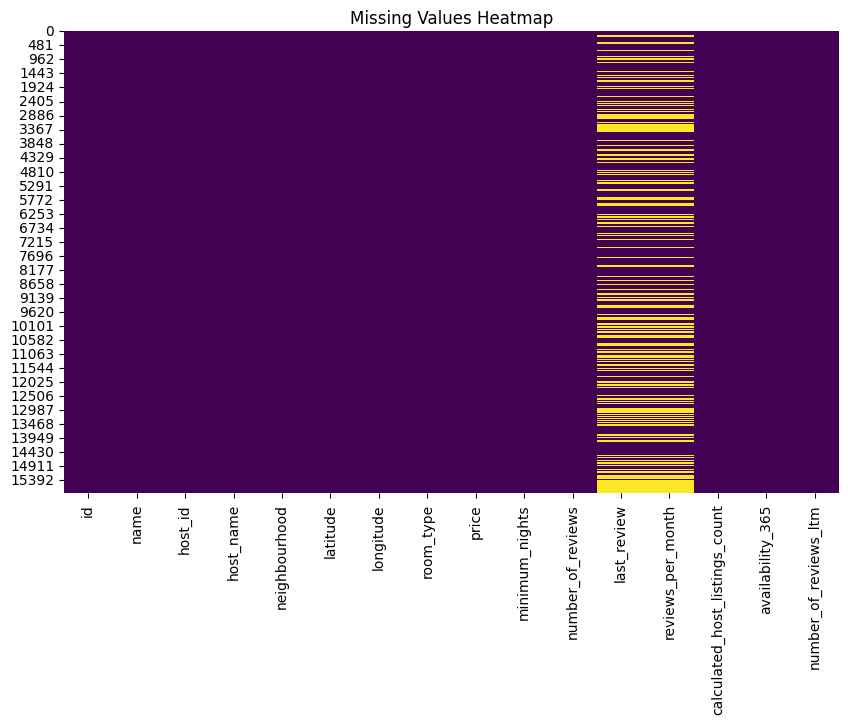

In [13]:
# Visualisasi missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_copy.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
# Mengecek apakah baris yang memiliki NaN di 'last_review' juga memiliki NaN di 'reviews_per_month'
missing_relationship = df_copy[['last_review', 'reviews_per_month']][df_copy['last_review'].isna() & df_copy['reviews_per_month'].isna()]

# Mereset indeks
missing_relationship_reset = missing_relationship.reset_index(drop=True)

# Menampilkan jumlah baris yang memiliki NaN di kedua kolom
print(f"Jumlah baris dengan NaN di kedua kolom: {missing_relationship_reset.shape[0]}")

# Menampilkan beberapa data yang memiliki NaN di kedua kolom
print(missing_relationship_reset.head(20))

Jumlah baris dengan NaN di kedua kolom: 5790
   last_review  reviews_per_month
0          NaN                NaN
1          NaN                NaN
2          NaN                NaN
3          NaN                NaN
4          NaN                NaN
5          NaN                NaN
6          NaN                NaN
7          NaN                NaN
8          NaN                NaN
9          NaN                NaN
10         NaN                NaN
11         NaN                NaN
12         NaN                NaN
13         NaN                NaN
14         NaN                NaN
15         NaN                NaN
16         NaN                NaN
17         NaN                NaN
18         NaN                NaN
19         NaN                NaN


Jika tidak ada ulasan terbaru (`last_review` kosong), maka `reviews_per_month` otomatis juga kosong, yang mengindikasikan bahwa baris-baris ini mungkin adalah listing yang tidak memiliki ulasan sama sekali. Oleh karena itu, untuk menangani missing values pada kedua kolom ini, langkah yang akan diambil adalah sebagai berikut:
- Membuat fitur baru `has_review` yang bernilai 1 jika `last_review` ada, dan 0 jika `last_review` kosong. Fitur ini akan memberikan gambaran yang jelas mengenai apakah listing memiliki ulasan atau tidak.
- Imputasi nilai `reviews_per_month` dengan 0, karena jika tidak ada ulasan yang diberikan, maka tidak ada ulasan per bulan yang tercatat. Imputasi ini akan memastikan bahwa data tetap konsisten dan dapat digunakan dalam analisis lebih lanjut, tanpa kehilangan informasi terkait performa ulasan.

Dengan langkah ini, maka dapat memastikan bahwa kedua kolom tersebut ditangani dengan cara yang logis dan menjaga kualitas dataset tanpa mengorbankan data penting yang tersedia.

In [15]:
# Mengisi missing values di 'reviews_per_month' dengan 0
df_copy['reviews_per_month'].fillna(0, inplace=True)

## Duplicate Check
Penting untuk memeriksa apakah ada **baris duplikat** dalam dataset sebelum melanjutkan ke proses analisis. Meskipun ID listing sudah tampaknya unik, proses pengecekan duplikat tetap perlu dilakukan untuk memastikan bahwa tidak ada data error yang bisa mempengaruhi kualitas dan akurasi analisis.

### Checklist Decision Duplicate
#### Duplicate Row Check

In [16]:
# Cek duplicate rows
df_copy.duplicated().sum()

np.int64(0)

In [17]:
# Cek duplikasi berdasarkan kombinasi kolom tertentu
duplicate_check = df_copy[['id', 'host_id']].duplicated().sum()
duplicate_check

np.int64(0)

- Hasil pemeriksaan menunjukkan **tidak ada baris duplikat identik** di dataset.
- Ini menunjukkan bahwa data sudah unik secara listing ID.
- Namun, pengecekan duplikat tetap wajib dilakukan sebagai langkah validasi awal untuk memastikan **tidak ada data error yang akan memengaruhi akurasi analisis dan rekomendasi kepada investor.**

## Data Type Correction
Sebelum melanjutkan analisis, penting untuk memastikan bahwa kolom numerik dan tanggal memiliki **tipe data yang benar**. Koreksi tipe data ini akan memastikan bahwa proses perhitungan dan analisis dapat dilakukan dengan akurat dan efisien.

### Checklist Decision Data Type
#### Data Type Correction: Kolom `price`& `last_review`

In [18]:
# Konversi kolom price ke float
df_copy['price'] = df_copy['price'].astype(float)

# Konversi kolom tanggal
df_copy['last_review'] = pd.to_datetime(df_copy['last_review'], errors='coerce')

# Mengubah kolom room_type dan neighbourhood menjadi category
df_copy['room_type'] = df_copy['room_type'].astype('category')
df_copy['neighbourhood'] = df_copy['neighbourhood'].astype('category')

- Kolom `price` sudah bertipe numerik (int64) dari awal.
- Untuk menjaga konsistensi precision saat perhitungan estimasi revenue (yang mungkin melibatkan pembagian), kolom ini diubah menjadi tipe data float.
- Hal ini memastikan seluruh perhitungan harga (mean, median, korelasi) dapat diproses secara akurat tanpa error parsing di tahap analisis selanjutnya.
- Kolom `last_review` diubah dari object ke datetime agar bisa digunakan dalam perhitungan durasi dan analisis tren waktu.
- `room_type` berisi nilai yang terbatas ("Entire home/apt", "Private room", "Hotel room", "Shared room"), sehingga sangat cocok untuk menggunakan tipe category dan mengubahnya akan memberikan efisiensi memori.
- `neighbourhood` berisi berbagai nama lokasi atau area, yang jumlahnya terbatas, sehingga juga lebih efisien jika diubah menjadi category.

#### Whitespace Trimming

In [19]:
# Menghilangkan whitespace ekstra
df_copy['room_type'] = df_copy['room_type'].str.strip()
df_copy['neighbourhood'] = df_copy['neighbourhood'].str.strip()
df_copy['host_name'] = df_copy['host_name'].str.strip()

Trim whitespace pada kolom kategorikal agar tidak terjadi error grouping saat aggregasi atau visualisasi.
Meski data terlihat bersih, langkah ini tetap dijalankan sebagai langkah pencegahan.

## Outlier Detection

<Figure size 1500x800 with 0 Axes>

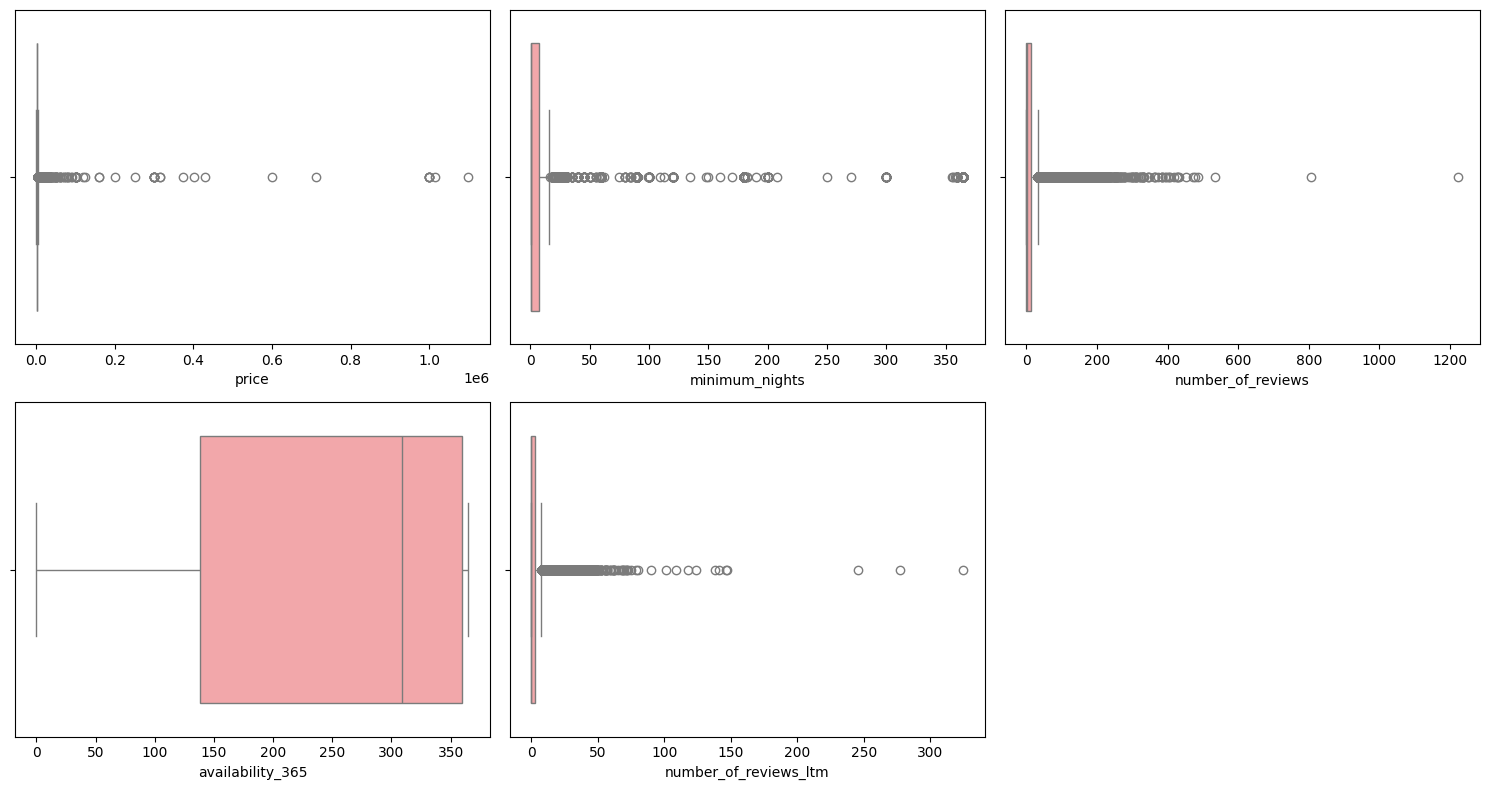

In [37]:
# Visualisasi Outlier dengan Boxplot
plt.figure(figsize=(15, 8))

# Boxplot untuk 'price'
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x=df_copy['price'], color='#FF9A9F')

# Boxplot untuk 'minimum_nights'
plt.subplot(2, 3, 2)
sns.boxplot(x=df_copy['minimum_nights'], color='#FF9A9F')

# Boxplot untuk 'number_of_reviews'
plt.subplot(2, 3, 3)
sns.boxplot(x=df_copy['number_of_reviews'], color='#FF9A9F')

# Boxplot untuk 'availability_365'
plt.subplot(2, 3, 4)
sns.boxplot(x=df_copy['availability_365'], color='#FF9A9F')

# Boxplot untuk 'number_of_reviews_ltm'
plt.subplot(2, 3, 5)
sns.boxplot(x=df_copy['number_of_reviews_ltm'], color='#FF9A9F')

plt.tight_layout()
plt.show()

**Insight Result :**

`price`:
- Data right skewed
- Mayoritas listing terkonsentrasi di rentang harga yang sangat rendah, terlihat dari boxplot yang padat di sisi kiri grafik
- Terdapat listing dengan harga yang jauh lebih tinggi daripada kebanyakan listing lain, membentuk outlier yang terletak jauh di sisi kanan grafik
 - Variasi harga yang luas ini mengindikasikan adanya segmentasi pasar
 - Perlu menangani outlier untuk melihat apakah ada listing dengan harga 0

`minimum_nights`:
- Data right skewed
- Terlihat ada banyak outlier pada sisi kiri, yang menunjukkan listing dengan durasi menginap yang sangat singkat
- Ada juga listing dengan durasi menginap yang lebih panjang yang bisa menunjukkan kebijakan tertentu dari host
- Perlu menangani outlier untuk melihat apakah ada listing dengan `minimum_nights` lebih dari satu tahun karena tidak sesuai dengan model bisnis Airbnb yang lebih fokus pada sewa jangka pendek

`number_of_reviews`:
- Data right skewed
- Ada beberapa outlier di sisi kanan yang menunjukkan listing dengan jumlah ulasan yang sangat tinggi (lebih dari 200)
- Sebagian besar listing memiliki jumlah ulasan yang lebih rendah
- Tidak perlu menangani outlier pada kolom `number_of_reviews` karena distribusi data yang right skewed sudah sesuai dengan pola umum di Airbnb

`availability_365`:
- Terlihat lebih simetris
- Sebagian besar listing tersedia selama 250 hingga 365 hari dalam setahun
- Tidak menunjukkan adanya outlier

`number_of_reviews_ltm`:
- Data right skewed
- Beberapa listing memiliki jumlah ulasan yang sangat tinggi dalam 12 bulan terakhir (lebih dari 100 hingga 200 ulasan)
- Sebagian besar listing memiliki sedikit ulasan dalam 12 bulan terakhir
- Tidak perlu menangani outlier karena bisa memberikan wawasan yang berharga tentang listing premium atau high-demand yang sangat populer di pasar Airbnb

In [21]:
# Cek sebaran price
print(f"Jumlah listing dengan harga 0: {df_copy[df_copy['price'] == 0].shape[0]}")
print(f"Jumlah listing dengan harga < 500: {df_copy[df_copy['price'] < 500].shape[0]}")

Jumlah listing dengan harga 0: 1
Jumlah listing dengan harga < 500: 753


#### Outlier Handling: `price` = 0 & Luxury Listings

In [22]:
df_copy = df_copy[df_copy['price'] > 0]

- Listing dengan `price = 0` dihapus dari dataset karena:
  - Biasanya merupakan kesalahan input data (tidak relevan untuk analisis performa listing).
  - Tidak masuk akal dari sisi bisnis platform Airbnb karena listing gratis tidak dapat dimonetisasi.
  - Mengganggu perhitungan estimasi revenue & analisis segmentasi harga.
- Luxury Listings (dengan price sangat tinggi) **tidak dihapus** karena:
  - Listing dengan harga premium adalah segmen pasar yang sah (luxury travel market).
  - Membantu host memahami diferensiasi performa di segmen high-end market.
  - Akan dianalisis secara khusus dalam segmentasi granular (price_category).

#### Outlier Handling: `minimum_nights` - Extreme High Value (1125 malam)

In [23]:
# Cek distribusi nilai unik minimum_nights yang ekstrem (di atas 365 malam)
extreme_min_nights = df_copy[df_copy['minimum_nights'] > 365]
print(f"Jumlah listing dengan minimum_nights > 365: {extreme_min_nights.shape[0]}")
print("Distribusi nilai ekstrem minimum_nights:")
print(extreme_min_nights['minimum_nights'].value_counts())

Jumlah listing dengan minimum_nights > 365: 15
Distribusi nilai ekstrem minimum_nights:
minimum_nights
500     3
999     2
1125    1
370     1
998     1
399     1
1115    1
700     1
450     1
1000    1
400     1
1095    1
Name: count, dtype: int64


In [24]:
# Menghapus listing dengan minimum_nights lebih dari 365
df_copy = df_copy[df_copy['minimum_nights'] <= 365]

# Menampilkan jumlah listing setelah penghapusan
print(f"Jumlah listing setelah penghapusan outlier: {df_copy.shape[0]}")

Jumlah listing setelah penghapusan outlier: 15838


Berdasarkan eksplorasi data, ditemukan **15 listing dengan nilai `minimum_nights` lebih dari 365 hari** (maksimum hingga 1125 malam atau ≈ 3 tahun). Nilai ini dianggap tidak wajar dalam konteks operasional Airbnb Bangkok dan berpotensi berasal dari:
1. Listing untuk penyewaan jangka panjang (long-term lease) yang terdaftar di Airbnb.
2. Kesalahan input dari host (data entry error).

#### Alasan Menghapus Data Ini:
1. **Menghindari distorsi statistik & visualisasi**
   - Outlier yang ekstrem pada kolom minimum_nights dapat mengganggu distribusi data dan menyebabkan kesalahan dalam perhitungan statistik atau visualisasi.
   - Menghapus data yang tidak wajar memastikan bahwa analisis statistik dan visualisasi lebih representatif dan akurasi.

2. **Volume minoritas yang tidak signifikan**
   - Data ini hanya mencakup 0.09% dari total listing (15 dari 15854 baris), sehingga penghapusan data ini tidak memengaruhi representasi data utama secara signifikan.

3. **Fokus Analisis Optimalisasi Host & Listing Aktif**
   - Tujuan analisis ini adalah untuk mengidentifikasi strategi optimalisasi performa listing dan mengaktifkan listing yang pasif.
   - Listing dengan minimum_nights sangat tinggi cenderung tidak relevan karena mereka lebih berfokus pada penyewaan jangka panjang atau kesalahan input data. 
   - Menghapus data ini membantu fokus pada listing yang lebih sesuai dengan tujuan optimasi Airbnb di Bangkok.

## Feature Engineering
 Melakukan pengecekan ulang untuk memastikan hasil cleaning sesuai ekspektasi dan data siap dianalisis.

### Status Ulasan pada Listing
Banyak listing yang tidak memiliki ulasan atau `last_review` kosong (NaN). Dengan membuat fitur `has_review`, bisa menandai apakah listing sudah punya ulasan atau tidak.

In [25]:
# Membuat fitur baru 'has_review' untuk menandai apakah ada ulasan atau tidak
df_copy['has_review'] = df_copy['last_review'].notnull().astype(int)

### Segmentasi Harga
Listing Airbnb di Bangkok yang masuk dalam kategori Medium Price (harga menengah) biasanya mencakup properti dengan harga sewa bulanan antara THB 500.000 hingga 1.000.000 (sekitar Rp250–500 juta). Namun, berdasarkan data pasar saat ini, hanya sedikit listing yang masuk dalam kategori ini. Sebagian besar listing berada dalam kategori Low Price (harga rendah), dengan harga sewa bulanan di bawah THB 500.000. Oleh karena itu, mengingat distribusi harga yang sangat terkonsentrasi pada harga rendah, segmentasi harga yang digunakan sebagai berikut:
- Low Price: Harga < THB 500.000.
- High Price: Harga ≥ THB 500.000.

Dengan segmentasi ini, Anda dapat lebih mudah menganalisis performa listing berdasarkan kategori harga yang lebih realistis dan sesuai dengan distribusi harga di pasar Airbnb Bangkok.

**Sumber:** [FazWaz](https://www.fazwaz.com/advice/airbnb-bangkok-short-term-rentals-come-at-a-steep-price?utm_source=chatgpt.com)

In [26]:
# Membuat kategori harga baru (price_category)
df_copy['price_category'] = pd.cut(df_copy['price'], 
                                    bins=[0, 500000, float('inf')], 
                                    labels=['Low Price', 'High Price'], 
                                    right=False)

# Menampilkan jumlah listing pada setiap kategori harga
print(df_copy['price_category'].value_counts())

price_category
Low Price     15829
High Price        9
Name: count, dtype: int64


**Insight Result:**
- Sebagian besar listing memiliki harga di bawah 500.000, yang sesuai dengan segmentasi pasar yang lebih terjangkau
- Sangat sedikit listing yang memiliki harga lebih dari 500.000 dan 1.000.000 menunjukkan bahwa pasar mewah di Airbnb di Bangkok tidak terlalu besar
- Mayoritas market Airbnb di Bangkok mungkin lebih fokus pada budget travelers, dengan sedikit listing yang masuk ke kategori mewah

### Tipe Host
Membuat fitur tipe host bisa sangat berguna untuk menganalisis perbedaan performa antara host profesional dan non-profesional. Berdasarkan jumlah listing yang dimiliki oleh host, bisa membedakan tipe host menjadi host profesional (yang memiliki banyak listing) dan host non-profesional (yang hanya memiliki satu listing).

In [27]:
# Membuat fitur 'host_type' berdasarkan jumlah listing yang dimiliki host
df_copy['host_type'] = df_copy['calculated_host_listings_count'].apply(lambda x: 'Professional' if x > 1 else 'Non-Professional')

# Menampilkan jumlah host profesional dan non-profesional
print(df_copy['host_type'].value_counts())

host_type
Professional        11239
Non-Professional     4599
Name: count, dtype: int64


## Post-Cleaning Data Validation
 Melakukan pengecekan ulang untuk memastikan hasil cleaning sesuai ekspektasi dan data siap dianalisis.

In [28]:
# Memeriksa missing values di seluruh dataset
print(df_copy.isnull().sum())

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5781
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
has_review                           0
price_category                       0
host_type                            0
dtype: int64


In [29]:
# Memeriksa duplikasi berdasarkan 'id' dan 'host_id'
print(df_copy.duplicated(subset=['id', 'host_id']).sum())

0


In [30]:
print(df_copy.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
has_review                                 int64
price_category                          category
host_type                                 object
dtype: object


In [31]:
# Cek distribusi harga
print(df_copy['price'].describe())

count    1.583800e+04
mean     3.202245e+03
std      2.494666e+04
min      2.780000e+02
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
Name: price, dtype: float64


In [32]:
# Cek distribusi minimum_nights
print(df_copy['minimum_nights'].describe())

count    15838.000000
mean        14.603738
std         44.715992
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max        365.000000
Name: minimum_nights, dtype: float64


In [33]:
# Cek distribusi reviews_per_month
print(df_copy['reviews_per_month'].describe())

count    15838.000000
mean         0.516450
std          0.952981
min          0.000000
25%          0.000000
50%          0.090000
75%          0.670000
max         19.130000
Name: reviews_per_month, dtype: float64


In [34]:
# Cek distribusi room_type
print(df_copy['room_type'].value_counts())

room_type
Entire home/apt    8902
Private room       5765
Hotel room          648
Shared room         523
Name: count, dtype: int64


In [35]:
# Cek distribusi neighbourhood
print(df_copy['neighbourhood'].value_counts())

neighbourhood
Vadhana                 2149
Khlong Toei             2096
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   808
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               547
Bang Na                  456
Parthum Wan              454
Din Daeng                444
Phaya Thai               422
Suanluang                380
Khlong San               357
Bang Kapi                260
Bang Sue                 249
Bang Phlat               217
Yan na wa                200
Thon buri                181
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Bangkok Yai               90
Dusit                     90


## Save Cleaned Dataset

Dataset telah melalui proses Data Preparation.

In [40]:
# Save Cleaned Dataset
df_copy.to_csv('airbnb_bangkok_cleaned.csv', index=False)
df = df_copy.copy()

Dengan data yang telah dibersihkan dan fitur yang telah dipersiapkan, analisis terhadap hubungan antar variabel dapat dilakukan dengan lebih akurat. Selanjutnya, tahapan berikutnya dalam proyek ini akan fokus pada eksplorasi data lebih lanjut, untuk menjawab pertanyaan-pertanyaan analitis yang telah dirumuskan sebelumnya.